# Model Comparison and Selection

This notebook completes step 5 of my capstone project.

Build different models (Gradient Boosting, Random Forest, Linear Regression, KNN, Support Vector, Naive Bayes) to predict NBA2024-2025 total points scored.

Compare the models MSE and R^2 values, choose one, and create an excel sheet with the predicted points of each player.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_excel(r'/Users/carlriemann/Documents/GitHub/Capstone-Two-Modeling/DataWrangling2.0.xlsx')
df_player_prediction = pd.read_excel(r'/Users/carlriemann/Documents/GitHub/Capstone-Two-Modeling/DataWrangling2.0prediction.xlsx')

In [3]:
print(df.shape)
print(df_player_prediction.shape)

(272, 86)
(272, 85)


In [4]:
print(df.columns)
print(df_player_prediction.columns)

Index(['Player', 'Age', 'Age_last_year', 'Age_year_before_last', 'G',
       'G_last_year', 'G_year_before_last', 'GS', 'GS_last_year',
       'GS_year_before_last', 'MP', 'MP_last_year', 'MP_year_before_last',
       'FG', 'FG_last_year', 'FG_year_before_last', 'FGA', 'FGA_last_year',
       'FGA_year_before_last', 'FG%', 'FG%_last_year', 'FG%_year_before_last',
       '3P', '3P_last_year', '3P_year_before_last', '3PA', '3PA_last_year',
       '3PA_year_before_last', '3P%', '3P%_last_year', '3P%_year_before_last',
       '2P', '2P_last_year', '2P_year_before_last', '2PA', '2PA_last_year',
       '2PA_year_before_last', '2P%', '2P%_last_year', '2P%_year_before_last',
       'eFG%', 'eFG%_last_year', 'eFG%_year_before_last', 'FT', 'FT_last_year',
       'FT_year_before_last', 'FTA', 'FTA_last_year', 'FTA_year_before_last',
       'FT%', 'FT%_last_year', 'FT%_year_before_last', 'ORB', 'ORB_last_year',
       'ORB_year_before_last', 'DRB', 'DRB_last_year', 'DRB_year_before_last',
       '

# Random Forest

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


df_numerical_only = df.drop(columns=['Player', 'Tm', 'Season'])

numerical_features = [
    'PTS', 'PTS_last_year', 'FG', 'FGA', 'FG_last_year', 'FGA_last_year', 
    '2PA', '2P', '2PA_last_year', 'FT_last_year', 'FT', 'FTA', 
    'FTA_last_year', '2P_last_year', 'PTS_year_before_last', 'TOV', 
    'FT_year_before_last', 'FG_year_before_last', 'TOV_last_year', 
    'FGA_year_before_last', 'FTA_year_before_last', 'MP', 'AST'
]

#use scaler
scaler = StandardScaler()

#fit the scaler on the numerical features and transform them
df_numerical_only[numerical_features] = scaler.fit_transform(df_numerical_only[numerical_features])

X = df_numerical_only[numerical_features] # Features
y = df_numerical_only['Points_scored_next_season']  # Target variable

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.metrics import r2_score

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on the training data
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Test MSE:", mse)


r2 = r2_score(y_test, y_pred)
print("Random Forest Test R-squared:", r2)

Random Forest Test MSE: 20.588049106181824
Random Forest Test R-squared: 0.6116807542082814


In [8]:
from sklearn.model_selection import GridSearchCV

#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#Fit the model
grid_search.fit(X_train, y_train)

#Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

#Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print("Best Random Forest Test MSE:", best_mse)
print("Best Random Forest Test R-squared:", best_r2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  0.706047636058632
Best Random Forest Test MSE: 18.888367458166968
Best Random Forest Test R-squared: 0.6437391144851168


# Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

#Fit the model on the training data
gb_model.fit(X_train, y_train)

#Predict on the test set
y_pred_gb_test = gb_model.predict(X_test)

#Evaluate the model performance
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
print("Gradient Boosting Test MSE:", mse_gb_test)

r2_gb_test = r2_score(y_test, y_pred_gb_test)
print("Gradient Boosting Test R-squared:", r2_gb_test)

Gradient Boosting Test MSE: 21.017059545148005
Gradient Boosting Test R-squared: 0.6035890205410007


In [10]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

#Set up the grid search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#Fit the model on the training data
grid_search.fit(X_train, y_train)

#Get the best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

#Evaluate the best model on the test set
best_gb_model = grid_search.best_estimator_
y_pred_gb_test = best_gb_model.predict(X_test)

#Calculate the MSE and R-squared on the test set
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)

print("Tuned Gradient Boosting Test MSE:", mse_gb_test)
print("Tuned Gradient Boosting Test R-squared:", r2_gb_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_est

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_es

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Gradient Boosting Test MSE: 19.84972144784566
Tuned Gradient Boosting Test R-squared: 0.625606640918265


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

#start model
lr_model = LinearRegression()

#fit the model on the training data
lr_model.fit(X_train, y_train)

#predict on the test set
y_pred_lr_test = lr_model.predict(X_test)

#evaluate the model on the test set
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

print("Linear Regression Test MSE:", mse_lr_test)
print("Linear Regression Test R-squared:", r2_lr_test)

Linear Regression Test MSE: 14.738602572165274
Linear Regression Test R-squared: 0.7220094528952423


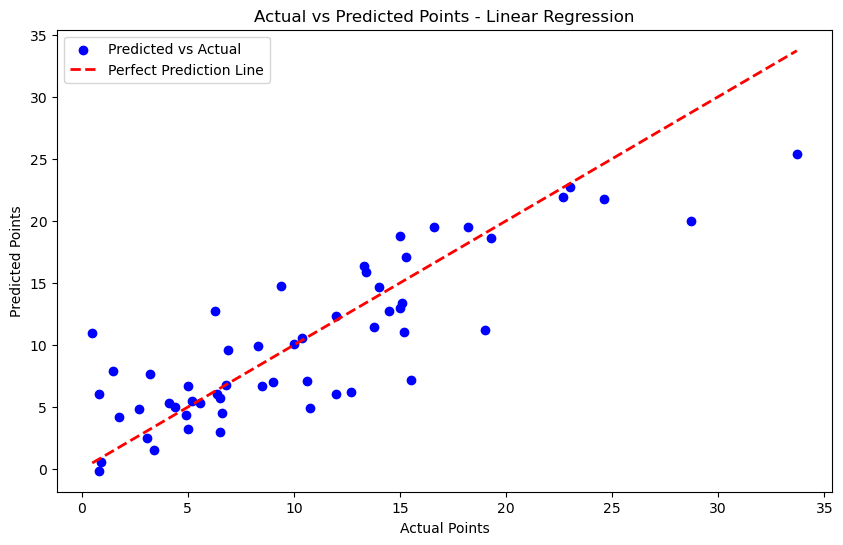

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, mi

In [23]:

plt.figure(figsize=(10, 6))

#Scatter plot of actual vs predicted points
plt.scatter(y_test, y_pred_lr_test, color='blue', label='Predicted vs Actual')

# Line of perfect prediction (diagonal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

#Labels and title
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points - Linear Regression')


plt.legend()


plt.show()

# Testing other models learned

# KNN

In [12]:
from sklearn.neighbors import KNeighborsRegressor

#Start the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

#Fit the model on the training data
knn_model.fit(X_train, y_train)

#Predict on the test set
y_pred_knn_test = knn_model.predict(X_test)

#Evaluate the model on the test set
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
r2_knn_test = r2_score(y_test, y_pred_knn_test)

print("KNN Test MSE:", mse_knn_test)
print("KNN Test R-squared:", r2_knn_test)

KNN Test MSE: 22.928347781818175
KNN Test R-squared: 0.5675394656401678


# Support Vector

In [13]:
from sklearn.svm import SVR

#start the SVM model
svm_model = SVR(kernel='rbf')

#Fit the model on the training data
svm_model.fit(X_train, y_train)

#Predict on the test set
y_pred_svm_test = svm_model.predict(X_test)

#Evaluate the model on the test set
mse_svm_test = mean_squared_error(y_test, y_pred_svm_test)
r2_svm_test = r2_score(y_test, y_pred_svm_test)

print("SVM Test MSE:", mse_svm_test)
print("SVM Test R-squared:", r2_svm_test)

SVM Test MSE: 18.256824436882127
SVM Test R-squared: 0.6556508943942057


# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

#Start the discretizer
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

#Fit and transform the target variable for training and test sets
y_train_binned = disc.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_binned = disc.transform(y_test.values.reshape(-1, 1)).ravel()

#Start the Naive Bayes model
nb_model = GaussianNB()

#Fit the model on the training data
nb_model.fit(X_train, y_train_binned)

#Predict on the test set
y_pred_nb_test = nb_model.predict(X_test)

#Evaluate the model on the test set using accuracy
accuracy_nb_test = accuracy_score(y_test_binned, y_pred_nb_test)
print("Naive Bayes Test Accuracy:", accuracy_nb_test)

Naive Bayes Test Accuracy: 0.7090909090909091


# Graphs of all Model Results

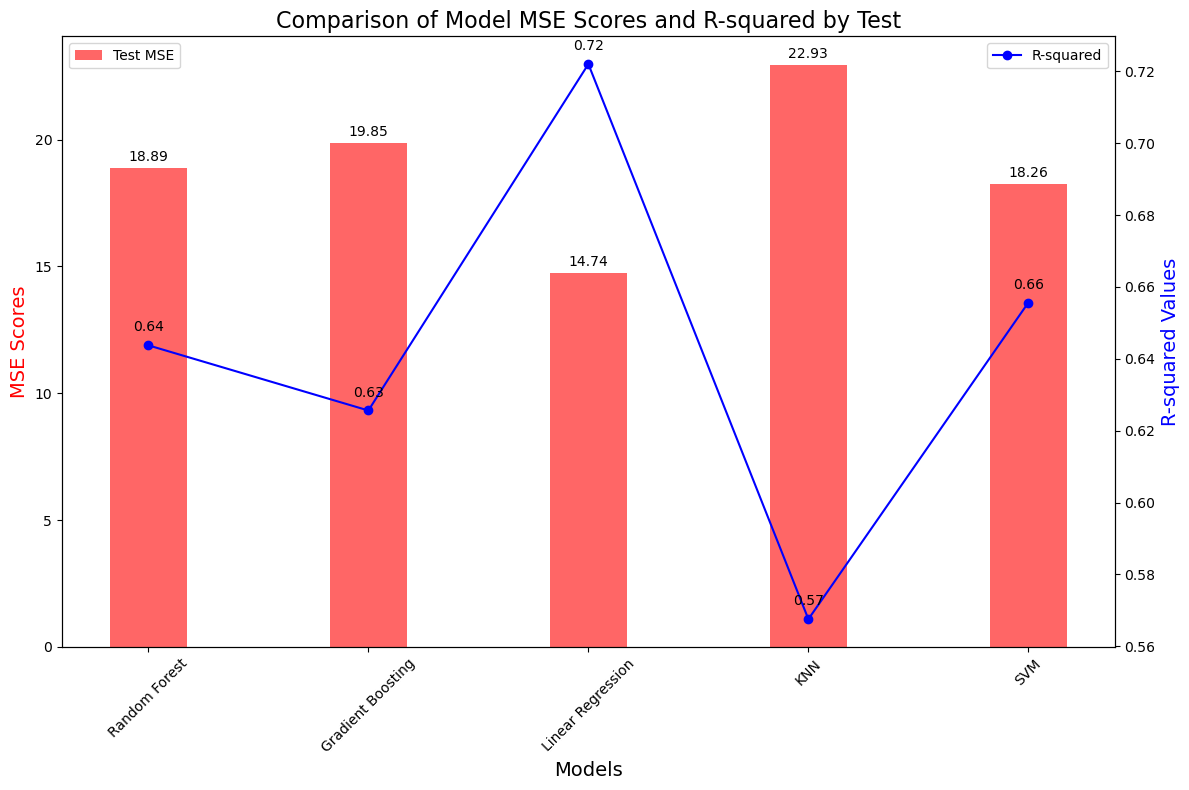

In [15]:
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'KNN', 'SVM']
test_mse = [18.888367458166968, 19.84972144784566, 14.738602572165274, 22.928347781818175, 18.256824436882127]
r_squared = [0.6437391144851168, 0.625606640918265, 0.7220094528952423, 0.5675394656401678, 0.6556508943942057]

index = np.arange(len(models))
bar_width = 0.35

#Plot the graph
fig, ax1 = plt.subplots(figsize=(12, 8))

#Plot Test MSE
rects1 = ax1.bar(index, test_mse, bar_width, label='Test MSE', color='r', alpha=0.6)

#Add a second y-axis for R-squared values
ax2 = ax1.twinx()
rects2 = ax2.plot(index, r_squared, marker='o', color='b', label='R-squared')

#Add labels, title, and custom x-axis tick labels, etc.
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('MSE Scores', fontsize=14, color='r')
ax2.set_ylabel('R-squared Values', fontsize=14, color='b')
ax1.set_title('Comparison of Model MSE Scores and R-squared by Test', fontsize=16)
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#Function to add labels on top of each MSE bar
def label_mse(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax1.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

#Function to add labels for R-squared values
def label_r2(ax, x, y):
    """Attach a text label near each R-squared point"""
    for i, txt in enumerate(y):
        ax.annotate(f'{txt:.2f}', (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')

label_mse(rects1)
label_r2(ax2, index, r_squared)

fig.tight_layout()
plt.show()

# Example of model usage to predict avg PTS of season 2024-25

In [16]:
#Keep the 'Player' column for reference
df_player_prediction_temp = df_player_prediction.copy()

#Drop 'Tm' and 'Season' columns but keep 'Player' for reference
df_player_prediction_temp = df_player_prediction_temp.drop(columns=['Tm', 'Season'])

#Ensure the numerical features are the same as in the training data (only include the trained features)
numerical_features = [
    'PTS', 'PTS_last_year', 'FG', 'FGA', 'FG_last_year', 'FGA_last_year', 
    '2PA', '2P', '2PA_last_year', 'FT_last_year', 'FT', 'FTA', 
    'FTA_last_year', '2P_last_year', 'PTS_year_before_last', 'TOV', 
    'FT_year_before_last', 'FG_year_before_last', 'TOV_last_year', 
    'FGA_year_before_last', 'FTA_year_before_last', 'MP', 'AST'
]

#Drop any columns from df_player_prediction_temp that are not in the numerical features list
df_player_prediction_temp = df_player_prediction_temp[numerical_features]


df_player_prediction_temp[numerical_features] = scaler.transform(df_player_prediction_temp[numerical_features])


players = df_player_prediction['Player']

#Ensure that the prediction data uses the exact same features as in training
X_player_prediction = df_player_prediction_temp[numerical_features]

#Make predictions using the trained model
df_player_prediction['Points_scored_next_season_predicted'] = lr_model.predict(X_player_prediction)

#Add the 'Player' column back and rearrange the DataFrame for clarity
df_player_prediction['Player'] = players
df_player_prediction = df_player_prediction[['Player', 'Points_scored_next_season_predicted']]

#Display the predictions with the corresponding players
df_player_prediction

,Player,Points_scored_next_season_predicted
0,Aaron Gordon,13.220032
1,Aaron Gordon,12.789903
2,Aaron Holiday,1.632353
3,Aaron Holiday,1.149276
4,Al Horford,7.020789
...,...,...
267,Wenyen Gabriel,2.529562
268,Wesley Matthews,2.502063
269,Wesley Matthews,3.276524
270,Yuta Watanabe,1.842582


In [17]:
df_player_prediction = df_player_prediction.drop_duplicates(subset=['Player'], keep='last')

In [18]:
df_player_prediction

,Player,Points_scored_next_season_predicted
1,Aaron Gordon,12.789903
3,Aaron Holiday,1.149276
5,Al Horford,7.896460
7,Alex Len,2.000489
9,Amir Coffey,1.396483
...,...,...
263,Tyler Herro,13.207407
265,Tyus Jones,7.221929
267,Wenyen Gabriel,2.529562
269,Wesley Matthews,3.276524


In [19]:
df_player_prediction.to_excel('NBA_player_pts_prediction_2025.xlsx', index=False)